<a href="https://colab.research.google.com/github/JAXMES/Artificial-Intelligence/blob/main/Week_2_Simple_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline

In [ ]:
raw_data = pd.read_csv("countries_men_height.csv", sep=',')

raw_data.head()

filter3 = (raw_data['Entity'] == "United Kingdom") & (raw_data['Year'] >= 1900)
# print(filter3)
data = raw_data[filter3]
data

,Entity,Code,Year,Human Height (cm)
1185,United Kingdom,GBR,1900,169.4
1186,United Kingdom,GBR,1910,170.9
1187,United Kingdom,GBR,1920,171.0
1188,United Kingdom,GBR,1930,173.9
1189,United Kingdom,GBR,1940,174.9
1190,United Kingdom,GBR,1950,176.0
1191,United Kingdom,GBR,1960,176.9
1192,United Kingdom,GBR,1970,177.1
1193,United Kingdom,GBR,1980,176.8


In [ ]:
#Clean data

data = data.set_index(["Year"])
data.head()

data.drop(["Entity", 'Code'], axis=1, inplace=True)

# axis specifies row drop or column drop
# axis=0 means row drop
# axis=1 means column drop
# inplace determines whether the modification is done to the original data frame
# inplace=True means modifying the original data frame
# inplace=False means create a new data frame for the modification

data.head()

data_new = data.drop([1900, 1910, 1960], axis=0, inplace=False)
data_new
data

,Human Height (cm)
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


In [ ]:
# Height Rate Variation (Calculation)
height_rate_variation = []
for year in data.index:
    if year == 1900:
      continue
    else:
      last_year = year - 10
      div_heights =  data.loc[year, 'Human Height (cm)'] - \
                      data.loc[last_year, 'Human Height (cm)']
      rate = div_heights / 10
      height_rate_variation.append(rate)
print(height_rate_variation)

[0.15, 0.009999999999999431, 0.2900000000000006, 0.1, 0.10999999999999943, 0.09000000000000057, 0.019999999999998862, -0.029999999999998295]


0.09250000000000008 -6.350000000000136


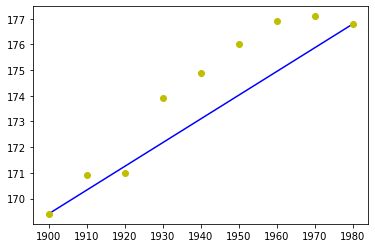

In [ ]:
# Modeling preparations
m = np.mean(height_rate_variation)
b = data.loc[1900, 'Human Height (cm)'] - m * 1900
print(m, b)

# X data
x = np.linspace(1900, 1980, 100)


# Y data
y = m * x + b


# Plotting the data
years = data.index
heights = data['Human Height (cm)']
plt.plot(x, y, 'b-')
plt.plot(years, heights, 'yo')

In [ ]:
# mean square error (MSE)
# Calculate errors for each year
# Calculate errors for each year

# all the years are contained in data.index 

errors = []

for year in data.index:
    # Calculate the squared error for that year
    x = year
    y = data.loc[x, 'Human Height (cm)']
    prediction = m * x + b
    error = (prediction - y) ** 2

    # append the error to the errors list
    errors.append(error)

# Now you should have a list of errors.
print(errors)

[0.0, 0.3306249999999869, 0.06250000000001421, 2.9756249999999804, 3.2399999999999385, 3.9006249999998652, 3.802499999999956, 1.5006249999999164, 8.077935669463161e-28]


In [ ]:
# Calculate the mean squared error, use np.mean() function
print(np.mean(errors))

# The MSE should be evaluated relatively.

1.7569444444444062
